Carga el dataset.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("06 - dataset.csv")

# Verifica tamaño del dataset:
print("Tamaño del dataset:", df.shape)

# Simulo valores faltantes en el dataset:

df_missing = df.copy()
for col in df_missing.columns:
    df_missing.loc[df_missing.sample(frac=0.05).index, col] = np.nan


# Revisa los tipos de datos y valores nulos:

df_missing.info()
df_missing.isnull().sum()

# Obtén estadísticas básicas:

print(df_missing.describe().T) #Imprime estadísticas de todas las columnas numéricas (Min, Max, Media, Std, etc.)



df_missing.to_csv("06 - dataset_valores_nulos.csv", index=False)


Tamaño del dataset: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                240996 non-null  float64
 1   HighChol              240996 non-null  float64
 2   CholCheck             240996 non-null  float64
 3   BMI                   240996 non-null  float64
 4   Smoker                240996 non-null  float64
 5   Stroke                240996 non-null  float64
 6   HeartDiseaseorAttack  240996 non-null  float64
 7   PhysActivity          240996 non-null  float64
 8   Fruits                240996 non-null  float64
 9   Veggies               240996 non-null  float64
 10  HvyAlcoholConsump     240996 non-null  float64
 11  AnyHealthcare         240996 non-null  float64
 12  NoDocbcCost           240996 non-null  float64
 13  GenHlth               240996 non-null  float64
 14  MentHlth           

Ahora cada columna tiene 240,996 valores no nulos, lo que significa que hay:

253,680 - 240,996 = 12,684 valores nulos por columna

12,684 / 253,680 ≈ 0.05 → 5% de datos faltantes por columna.



 Descripción general del dataset
Instancias (filas): 253,680

Atributos (columnas): 22

Tipo de datos: Todos son float64, indicando que variables originalmente binarias/categóricas se han convertido a flotantes (probablemente por presencia de valores nulos).


Todas las columnas tienen 240,996 valores no nulos, es decir, aproximadamente 5% de datos faltantes por columna, lo cual concuerda con el requerimiento del trabajo de simular datos faltantes si no existían originalmente.

Varias variables muestran distribuciones sesgadas (especialmente MentHlth, PhysHlth, BMI).

Hay posibles outliers, especialmente en BMI (hasta 98).

La variable objetivo (Diabetes_binary) tiene clase positiva muy escasa (14%), lo que requiere técnicas especiales durante el entrenamiento.

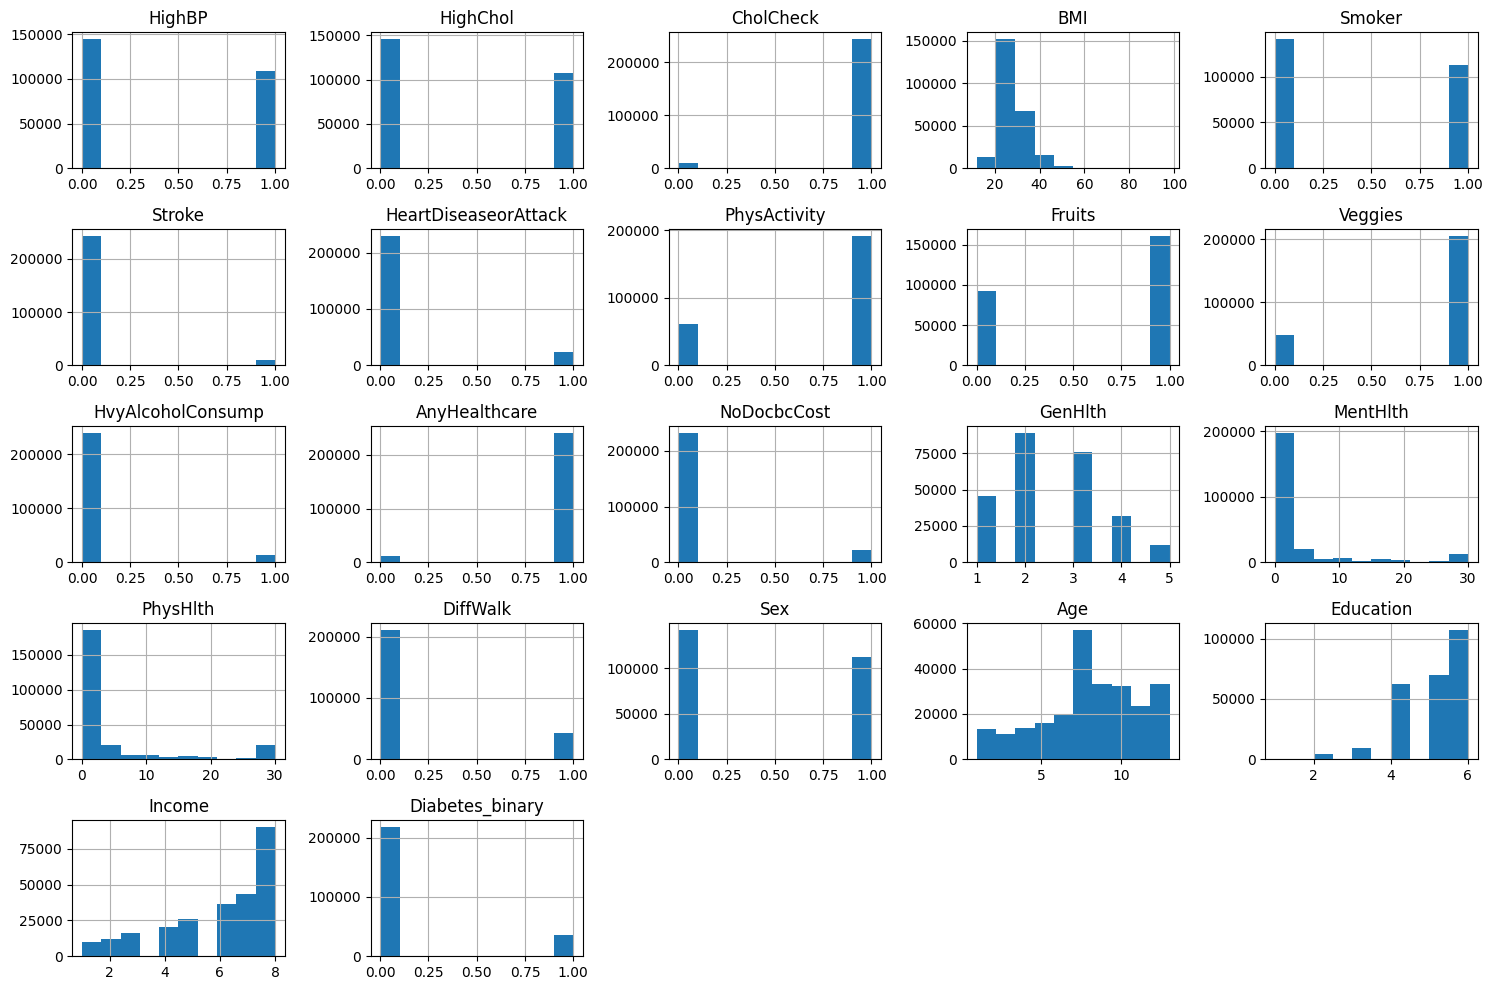

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

<Axes: >

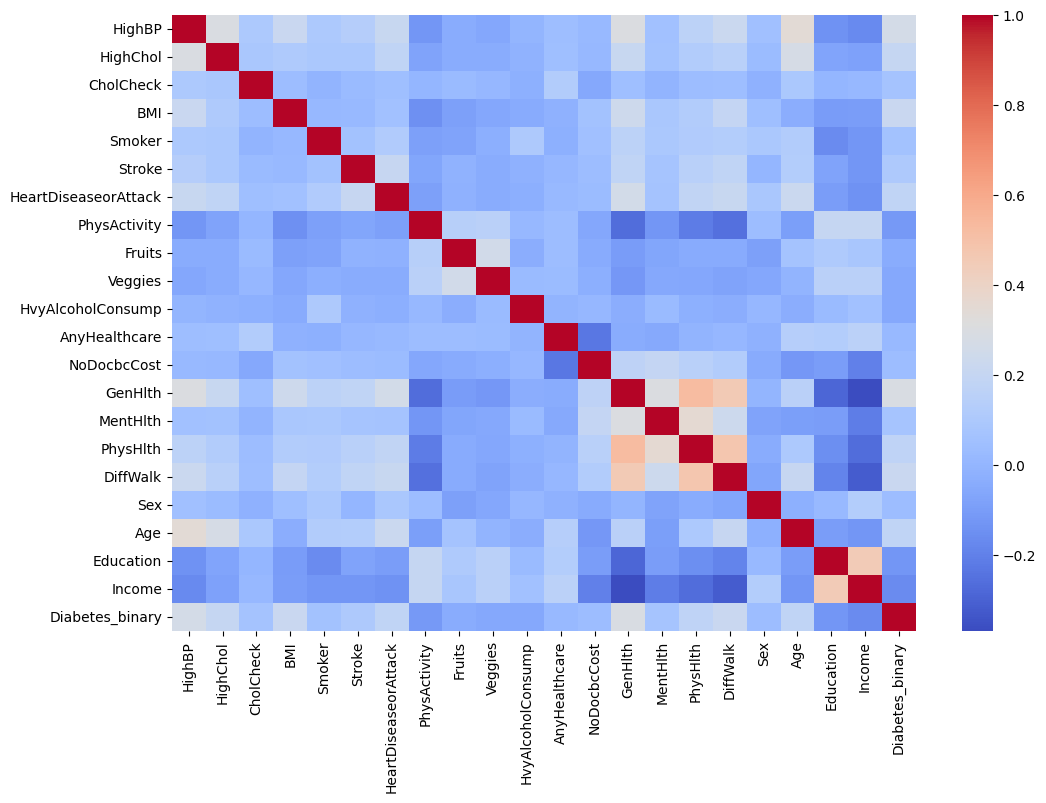

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)


Correlaciones más destacadas (positivas)
🔹 GenHlth vs MentHlth y PhysHlth
Correlaciones positivas moderadas (~0.4–0.5)
→ Tiene sentido: a peor salud general, más días reportados de mala salud física o mental.

🔹 Income vs Education
Correlación positiva (~0.4)
→ Personas con mayor educación tienden a tener mayor ingreso.

🔹 HeartDiseaseorAttack vs HighBP / HighChol
Correlaciones positivas suaves (~0.2)
→ Personas con hipertensión o colesterol alto tienden a reportar enfermedades cardíacas.

 Conclusión
No hay colinealidades graves (no se observan correlaciones cercanas a 1 entre predictores), por lo que no es urgente eliminar variables por redundancia.

El patrón es coherente con lo esperado: factores de salud y socioeconómicos tienen relaciones lógicas.

Estas observaciones pueden ayudarte a seleccionar variables más relevantes para modelos y análisis posteriores.



<Axes: xlabel='BMI', ylabel='Age'>

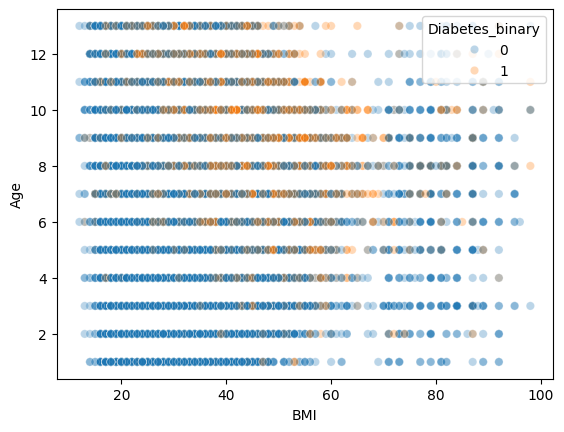

In [17]:
sns.scatterplot(data=df, x="BMI", y="Age", hue="Diabetes_binary", alpha=0.3)


Mayor densidad en BMI entre 20 y 40:

La mayoría de los puntos (tanto con como sin diabetes) se concentra en este rango, lo cual es esperable ya que representa rangos saludables a sobrepeso.

Casos con diabetes aparecen más en valores altos de BMI:

Los puntos coloreados como clase 1 (diabetes) se agrupan más visiblemente por encima de BMI 30, especialmente en edades codificadas como 8 a 12.

Esto sugiere que el riesgo de diabetes aumenta con mayor índice de masa corporal.

Distribución por edad:

A mayor edad (valores mayores en eje Y), hay más casos de diabetes visibles.

La relación BMI + Edad parece ser relevante para el riesgo de diabetes.

Poca separación visual total:

Aunque hay patrones, no hay una clara división entre clases visualmente. Esto confirma que la clasificación requerirá modelos complejos o multivariados.




Hipótesis que se pueden plantear

El riesgo de diabetes aumenta con el BMI, especialmente en edades más avanzadas.

Se podría incluir una interacción no lineal entre edad y BMI en los modelos futuros para mejorar la precisión.

    Interpretación general del histograma de variables
Variables binarias (0 o 1)
Variables como HighBP, HighChol, CholCheck, Smoker, Stroke, etc., muestran distribuciones muy desbalanceadas:

Por ejemplo: la mayoría de personas no tienen presión alta, colesterol alto, ni han tenido un derrame cerebral.

Esto sugiere que hay un sesgo natural hacia personas sanas, lo cual podría explicar el desbalance observado en la variable objetivo (Diabetes_binary).

    Variable objetivo: Diabetes_binary
Hay muchos más casos sin diabetes (0) que con diabetes (1).

Confirma que este es un problema de clases desbalanceadas, lo cual es crucial para las decisiones de modelado.

 Variables numéricas
🔹 BMI (Índice de masa corporal)
Distribución sesgada hacia la derecha.

Posiblemente hay valores atípicos altos, pero la mayoría se concentra entre 20 y 40.

🔹 MentHlth y PhysHlth
Claramente sesgadas a la izquierda, la mayoría reporta de 0 a 5 días de mala salud mental/física.

Muchos ceros → gente que no reporta problemas.

🔹 GenHlth (Salud general), Age, Education, Income
Variables ordinales con distribuciones variadas:

GenHlth: mayoría reporta 2 o 3 (regular/buena).

Age: escalas codificadas; parece normalizada por grupos de edad.

Income: niveles más altos aparecen con más frecuencia (aunque aún disperso).


 Conclusión exploratoria inicial
El dataset contiene muchas variables binarias, lo cual favorece modelos basados en árboles.

Hay desequilibrio fuerte en la clase positiva (Diabetes_binary = 1).

Varias variables numéricas están sesgadas, lo cual justifica estandarización para modelos como SVM.

Hay posibilidad de outliers en BMI, MentHlth, PhysHlth.